In [1]:
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load CSV files into DataFrames
courses_df = pd.read_csv('../staging/transformed_courses.csv')
performance_df = pd.read_csv('../staging/transformed_performance.csv')
enrollment_df = pd.read_csv('../staging/transformed_enrollment.csv')
users_df = pd.read_csv('../staging/transformed_users.csv')
learning_paths_df = pd.read_csv('../staging/transformed_learning_path.csv')
performance_enriched = pd.read_csv('../staging/performance_enriched.csv')
enriched_enrollments = pd.read_csv('../staging/enriched_enrollments.csv')

# Preview loaded data
print(courses_df.head())
print(performance_df.head())
print(enrollment_df.head())
print(users_df.head())
print(learning_paths_df.head())
print(performance_enriched.head())
print(enriched_enrollments.head())

   id                 title  duration    difficulty  rating            domain
0   1       Cloud Computing   8 hours      advanced     3.3      Data Science
1   2       Web Development  42 hours      beginner     3.7   Web Development
2   3  Intro to Programming  31 hours      beginner     1.0  Computer Science
3   4       Cloud Computing  84 hours      advanced     1.6  Computer Science
4   5       Data Structures  72 hours  intermediate     3.8   Cloud Computing
   id  user_id  enrollment_id  score grade  progress  certificate_earned
0   1       39             15     73     D        24               False
1   2       80             92     60     A        92                True
2   3       48             44     68     D         2                True
3   4       43             72     61     B        34               False
4   5       10              3     57     B        66               False
   id  user_id  course_id enrollment_date completion_date
0   1       19         90      2024-

C:\Users\Admin\AppData\Local\Temp\ipykernel_21824\367284807.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_completion = enriched_enrollments.groupby('user_id').apply(lambda x: (x['completion_date'] != 'Incomplete').sum())


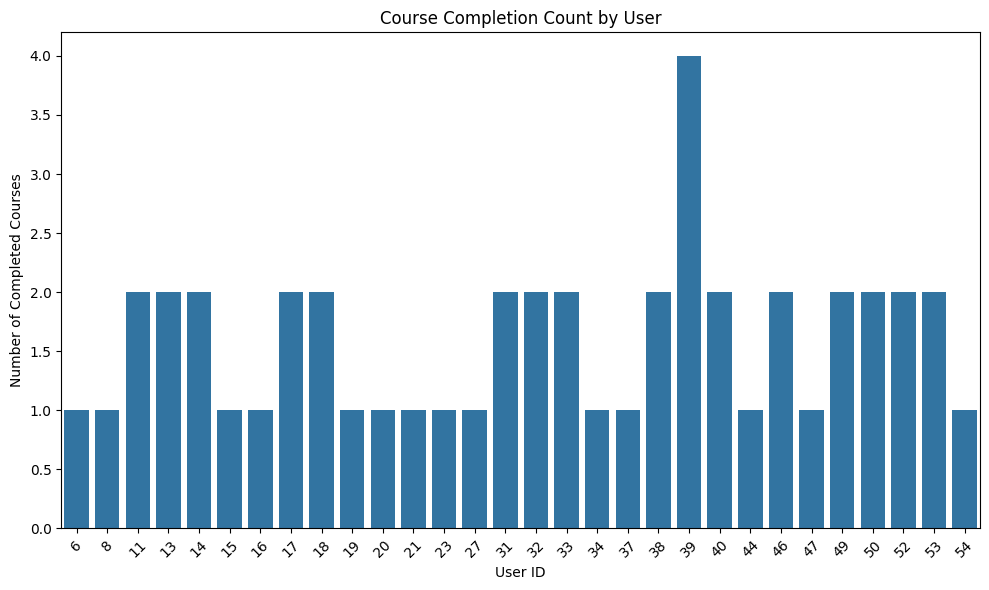

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



# Count completed courses per user
user_completion = enriched_enrollments.groupby('user_id').apply(lambda x: (x['completion_date'] != 'Incomplete').sum())

# Bar plot for user completion rates
plt.figure(figsize=(10, 6))
sns.barplot(x=user_completion.index, y=user_completion.values)
plt.title('Course Completion Count by User')
plt.xlabel('User ID')
plt.ylabel('Number of Completed Courses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

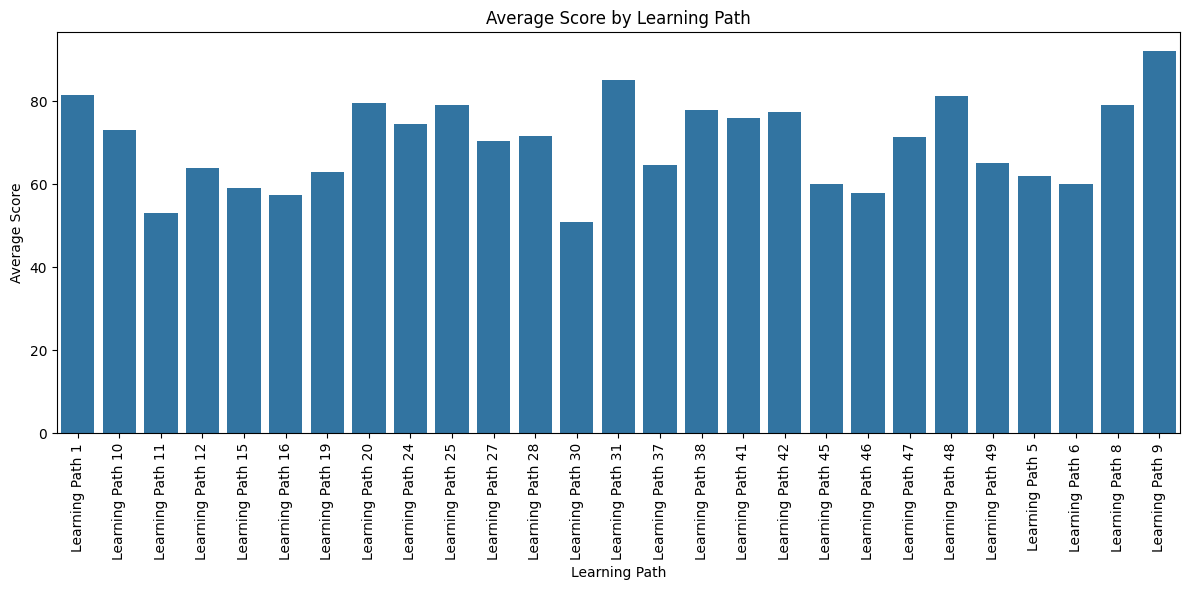

In [4]:
# Merge performance with learning paths
performance_with_paths = pd.merge(performance_enriched, learning_paths_df, left_on='course_id', right_on='id')

# Calculate average score by learning path
average_score_by_path = performance_with_paths.groupby('title')['score'].mean()

# Bar plot for average score by learning path
plt.figure(figsize=(12, 6))
sns.barplot(x=average_score_by_path.index, y=average_score_by_path.values)
plt.title('Average Score by Learning Path')
plt.xlabel('Learning Path')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


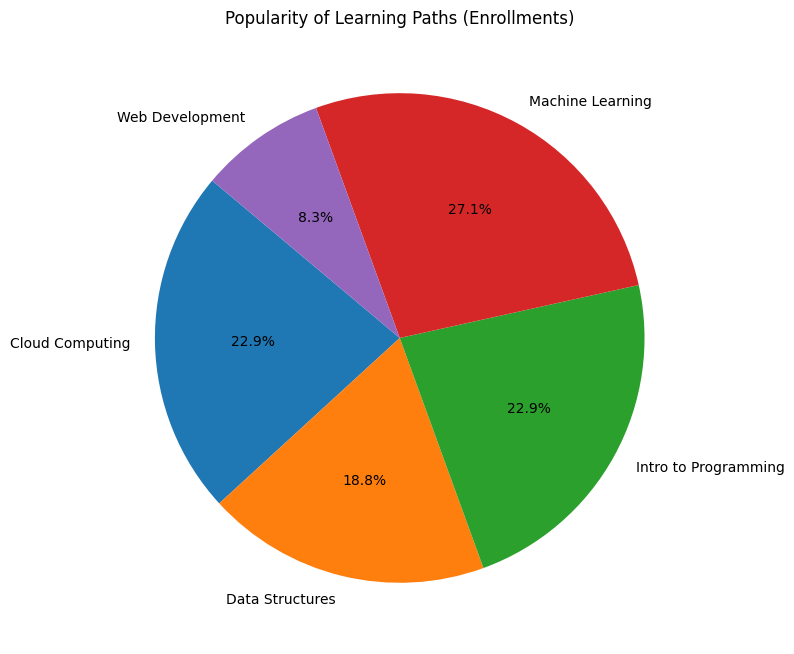

In [5]:
# Count number of enrollments per learning path
path_enrollments = enriched_enrollments.groupby('title').size()

# Pie chart for learning path popularity
plt.figure(figsize=(8, 8))
plt.pie(path_enrollments, labels=path_enrollments.index, autopct='%1.1f%%', startangle=140)
plt.title('Popularity of Learning Paths (Enrollments)')
plt.tight_layout()
plt.show()

Top 5 Users by Average Score:
user_id_x
7     100.0
74    100.0
68     99.0
26     99.0
42     95.0
Name: score, dtype: float64


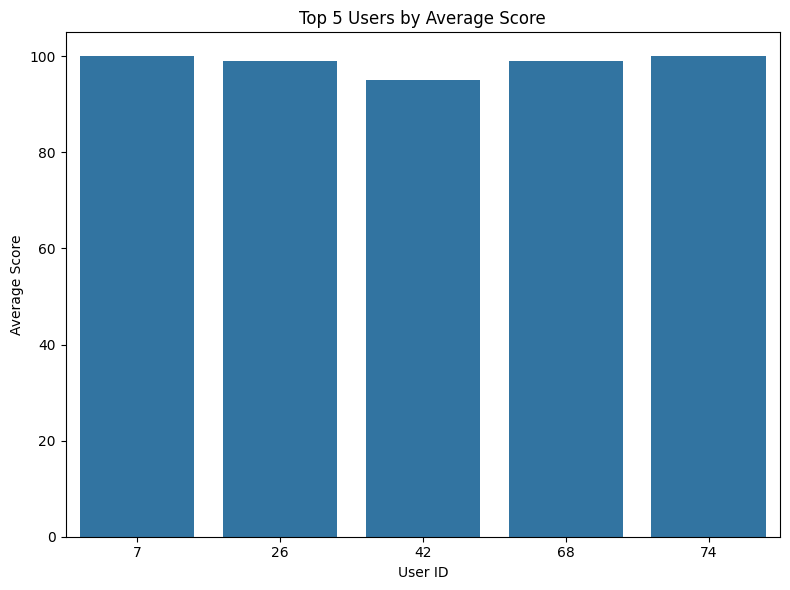

In [10]:
# Calculate average score by user
average_score_by_user = performance_enriched.groupby('user_id_x')['score'].mean().sort_values(ascending=False)

# Get top 5 users
top_5_users = average_score_by_user.head(5)

print("Top 5 Users by Average Score:")
print(top_5_users)

# Bar plot for top 5 users
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_users.index, y=top_5_users.values)
plt.title('Top 5 Users by Average Score')
plt.xlabel('User ID')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()


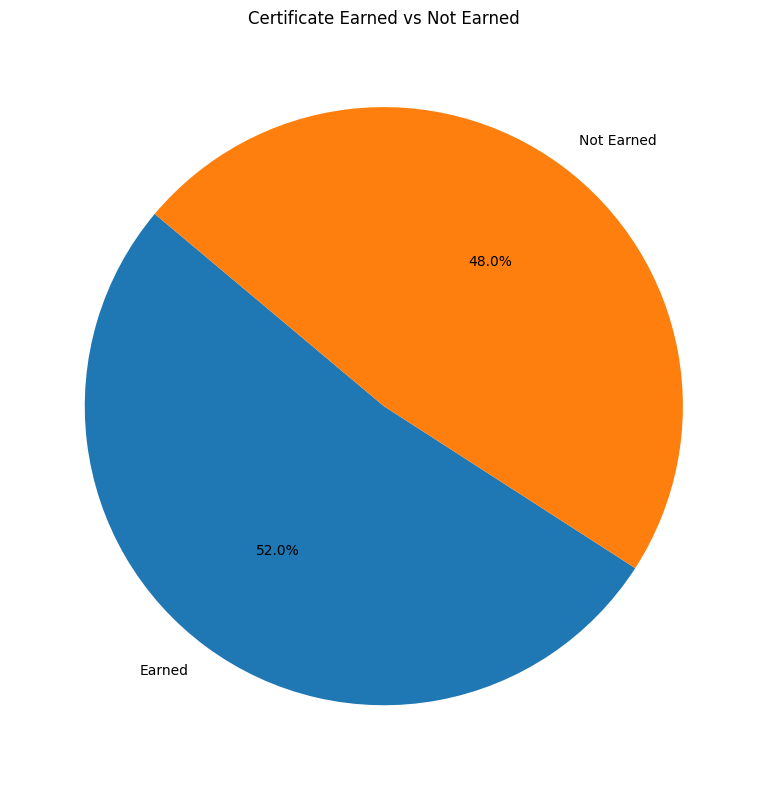

In [11]:
# Count of certificate earned vs not earned
certificate_earned_count = performance_df['certificate_earned'].value_counts()

# Pie chart for certificates earned vs not earned
plt.figure(figsize=(8, 8))
plt.pie(certificate_earned_count, labels=['Earned', 'Not Earned'], autopct='%1.1f%%', startangle=140)
plt.title('Certificate Earned vs Not Earned')
plt.tight_layout()
plt.show()


In [29]:
courses_df['duration'] = courses_df['duration'].replace(" hours", "", regex=True)
courses_df['duration'] = pd.to_numeric(courses_df['duration'], errors='coerce')
courses_df['duration'].dtype


dtype('int64')

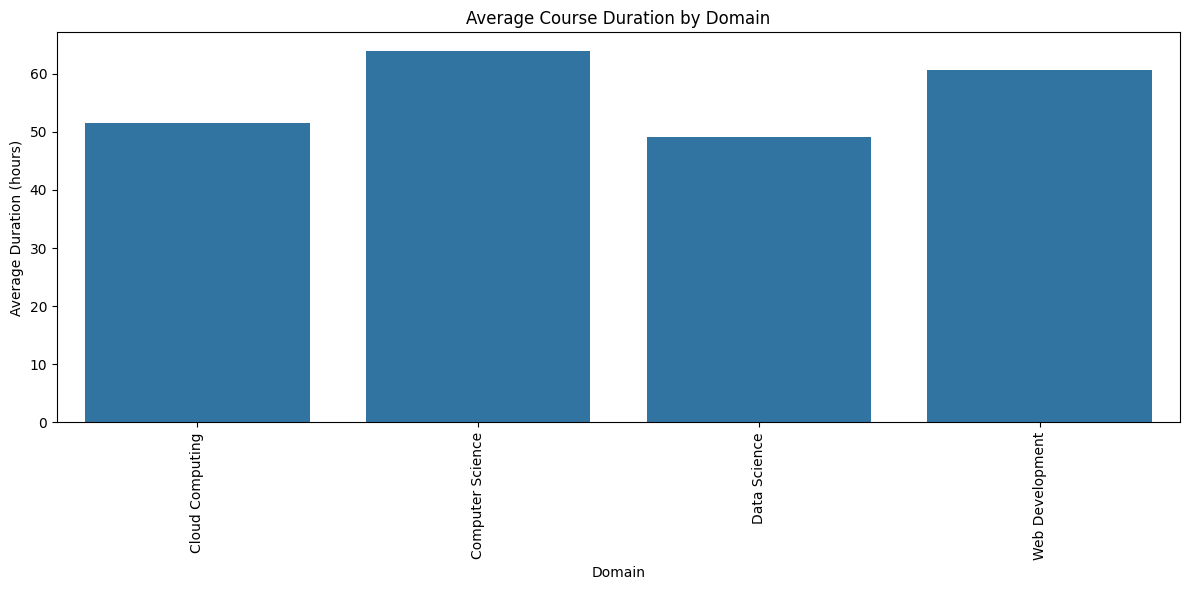

In [30]:
# Group by domain and calculate average duration
average_duration_by_domain = courses_df.groupby('domain')['duration'].mean()

# Bar plot for average duration by domain
plt.figure(figsize=(12, 6))
sns.barplot(x=average_duration_by_domain.index, y=average_duration_by_domain.values)
plt.title('Average Course Duration by Domain')
plt.xlabel('Domain')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


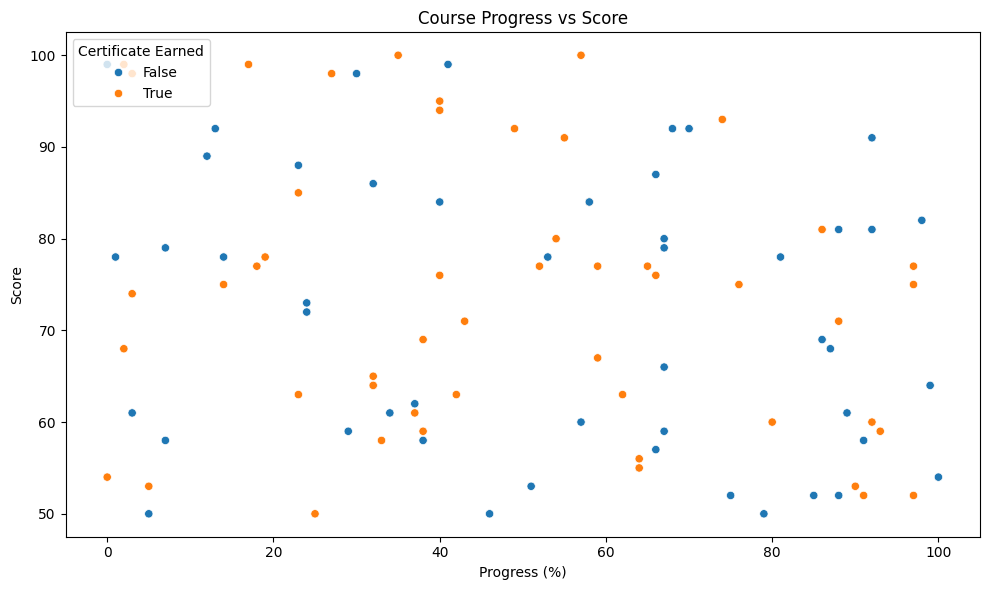

In [31]:
# Scatter plot of progress vs. score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=performance_df, x='progress', y='score', hue='certificate_earned')
plt.title('Course Progress vs Score')
plt.xlabel('Progress (%)')
plt.ylabel('Score')
plt.legend(title='Certificate Earned', loc='upper left')
plt.tight_layout()
plt.show()


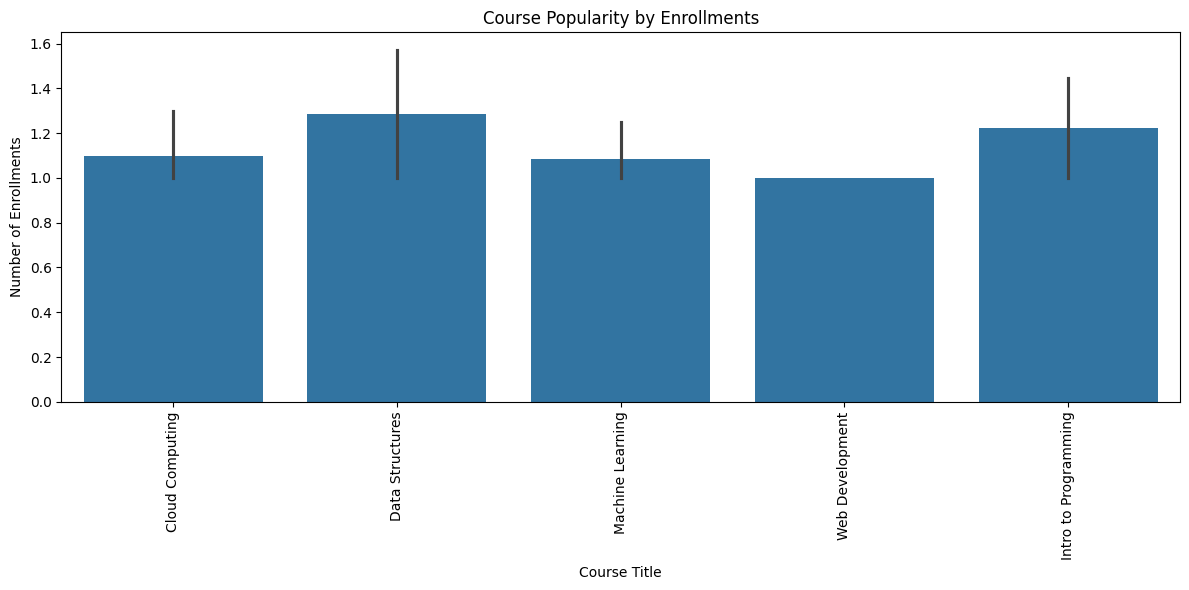

In [39]:
# Count of enrollments per course
enrollment_count = enriched_enrollments.groupby('course_id').size().reset_index(name='enrollment_count')

# Merge with course titles for better visualization
course_enrollment = pd.merge(enrollment_count, courses_df[['id', 'title']], left_on='course_id', right_on='id')

# Bar plot for course enrollments
plt.figure(figsize=(12, 6))
sns.barplot(x=course_enrollment['title'], y='enrollment_count', data=course_enrollment)
plt.title('Course Popularity by Enrollments')
plt.xlabel('Course Title')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [40]:
# Merge performance data with course data to get difficulty level
performance_with_difficulty = pd.merge(performance_df, courses_df[['id', 'difficulty']], left_on='course_id', right_on='id')

# Calculate average score by difficulty level
average_score_by_difficulty = performance_with_difficulty.groupby('difficulty')['score'].mean()

# Bar plot for average score by difficulty level
plt.figure(figsize=(8, 6))
sns.barplot(x=average_score_by_difficulty.index, y=average_score_by_difficulty.values)
plt.title('Average Score by Course Difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()


KeyError: 'course_id'

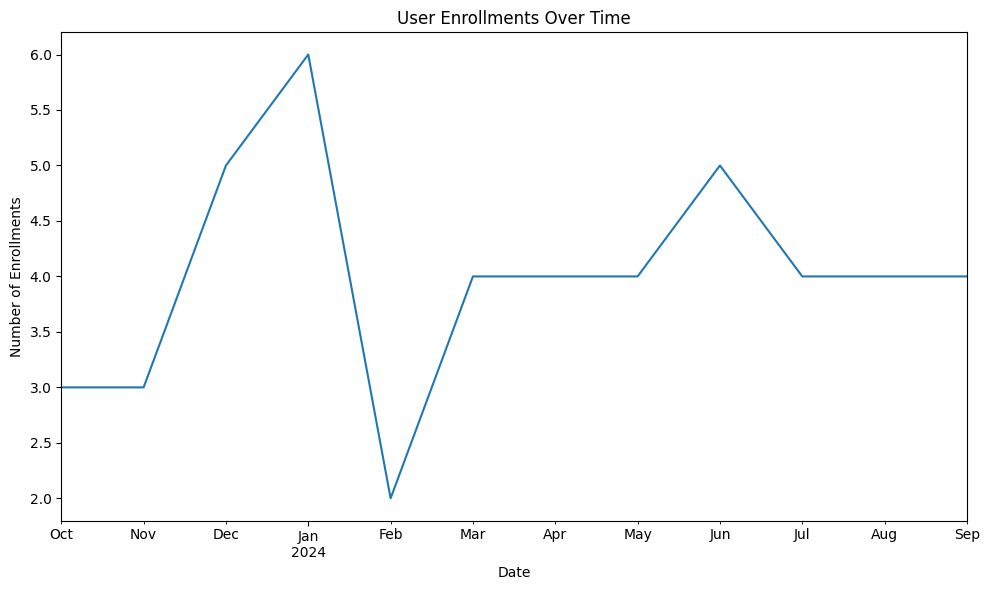

In [41]:
# Convert enrollment date to datetime if necessary
enriched_enrollments['enrollment_date'] = pd.to_datetime(enriched_enrollments['enrollment_date'])

# Group by month or year to analyze trends
enrollments_over_time = enriched_enrollments.groupby(enriched_enrollments['enrollment_date'].dt.to_period('M')).size()

# Line plot for enrollments over time
plt.figure(figsize=(10, 6))
enrollments_over_time.plot(kind='line')
plt.title('User Enrollments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.tight_layout()
plt.show()
